<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Bayesian-estimation-of-a-logistic-regression-model" data-toc-modified-id="Bayesian-estimation-of-a-logistic-regression-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Bayesian estimation of a logistic regression model</a></span></li><li><span><a href="#logit-and-inverse-logit-functions" data-toc-modified-id="logit-and-inverse-logit-functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>logit and inverse logit functions</a></span></li><li><span><a href="#Steps-of-Bayesian-data-analysis" data-toc-modified-id="Steps-of-Bayesian-data-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Steps of Bayesian data analysis</a></span></li><li><span><a href="#Step-1---Identify-the-relevant-data-for-question-under-investigation" data-toc-modified-id="Step-1---Identify-the-relevant-data-for-question-under-investigation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step 1 - Identify the relevant data for question under investigation</a></span></li><li><span><a href="#Exploratory-analysis-and-daata-visualisation" data-toc-modified-id="Exploratory-analysis-and-daata-visualisation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory analysis and daata visualisation</a></span></li><li><span><a href="#Step-2---Define-the-descriptive-statistical-model-\begin{align*}
\\y_n-&amp;\sim-Bernoulli(logistic(\alpha-+-\beta-x))
\\
\alpha-&amp;\sim-Normal(0,-1.5)
\\
\beta-&amp;\sim-Normal(0,0.3)
\end{align*}" data-toc-modified-id="Step-2---Define-the-descriptive-statistical-model-\begin{align*}
\\y_n-&amp;\sim-Bernoulli(logistic(\alpha-+-\beta-x))
\\
\alpha-&amp;\sim-Normal(0,-1.5)
\\
\beta-&amp;\sim-Normal(0,0.3)
\end{align*}-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Step 2 - Define the descriptive statistical model <div class="MathJax_Display MathJax_Processing"></div><script type="math/tex; mode=display" id="MathJax-Element-12">\begin{align*}
\\y_n &\sim Bernoulli(logistic(\alpha + \beta x))
\\
\alpha &\sim Normal(0, 1.5)
\\
\beta &\sim Normal(0,0.3)
\end{align*}</script></a></span></li><li><span><a href="#Step-3---Specifying-priors" data-toc-modified-id="Step-3---Specifying-priors-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Step 3 - Specifying priors</a></span></li><li><span><a href="#Fitting-the-model" data-toc-modified-id="Fitting-the-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Fitting the model</a></span></li><li><span><a href="#Post-model-fit-visualisations---Bayesian-logisitc-regression" data-toc-modified-id="Post-model-fit-visualisations---Bayesian-logisitc-regression-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Post model fit-visualisations - Bayesian logisitc regression</a></span><ul class="toc-item"><li><span><a href="#Posterior-distribution-plots" data-toc-modified-id="Posterior-distribution-plots-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Posterior distribution plots</a></span></li><li><span><a href="#Posterior--autocorrelation-plots" data-toc-modified-id="Posterior--autocorrelation-plots-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Posterior  autocorrelation plots</a></span></li></ul></li><li><span><a href="#Posterior-trace-plots" data-toc-modified-id="Posterior-trace-plots-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Posterior trace plots</a></span></li><li><span><a href="#Step-5---Posterior-predictive-checks" data-toc-modified-id="Step-5---Posterior-predictive-checks-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Step 5 - Posterior predictive checks</a></span></li><li><span><a href="#Reporting-the-results-of-the-Bayesian-logistic-regression" data-toc-modified-id="Reporting-the-results-of-the-Bayesian-logistic-regression-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Reporting the results of the Bayesian logistic regression</a></span><ul class="toc-item"><li><span><a href="#Write-up" data-toc-modified-id="Write-up-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span><font size="3">Write up</font></a></span></li></ul></li><li><span><a href="#Multiple-logistic-regression" data-toc-modified-id="Multiple-logistic-regression-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Multiple logistic regression</a></span></li><li><span><a href="#Adding-predcitor-variables" data-toc-modified-id="Adding-predcitor-variables-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Adding predcitor variables</a></span><ul class="toc-item"><li><span><a href="#Fitting-multiple-logistic-regression" data-toc-modified-id="Fitting-multiple-logistic-regression-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Fitting multiple logistic regression</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>References</a></span></li></ul></div>

In [1]:
# Import data analysis and visualisation packages
import numpy as np
import pandas as pd
import patsy as pt
import stan as ps
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import arviz as az

# Importing nest_asyncio is only necessary to run pystan in Jupyter Notebooks.
import nest_asyncio
nest_asyncio.apply();

In [4]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Bayesian estimation of a logistic regression model

Before discussion of Bayesain logistic regression a short of the review of classical logistic regression is required. Logisitic regression is better understood for its application to classification problems under the general framework of machine learning (Burkov, 2019; Martin, 2016). Logistic regression then is not even really regression but it often concptualised under the generalised linear model framework due to its continuation of foundations laid out by linear regression. Logisitc regressions primary purpose in data analyis is to model data and estimate parameters.With this modelling being specific to binary outcome data ($y$ that take on values of either 0 or 1).

In order to model this type of data two additonal features are required on top of the standard regression model $y = \alpha + \beta x$. These featues being:
     
     1. a nonlinear transformation which bounds outputs between 0 and 1.
     2. modelling the resulting outcomes as probabilities.
     
The features above are achieved through the generalised linear model framework through the application of a link function which for the logistic regression is the the logit function $logit(x) = log(\frac{x}{1-x})$ that maps the outome space from probabilty values (0,1) to log-odds $(-\infty,\infty )$.

In additon to the logit(x) function the inverse logit function $logit^{-1} = \frac{e^x}{1+e^x}$ is alos of critcal importance as this allows the coeffients oestiamted form the model to be converted into probabilities for ease of interpretation.

Of course, classical logistic regression uses Null hypothesis signifcance testing for its inference for which the p-values are calculated for each regression coefficient using the Wald test (unlike regular regression which uses t-tests).

$$Z = \frac{\hat{\beta}}{s.e.(\hat{\beta})}$$

$\hat{\beta}$ = maximum likelihood estimate of the $\beta$ parameter.

$s.e.$ = standard error

With this commonly testing the null hypothesis of $H_0: \hat{\beta} = 0$

# logit and inverse logit functions

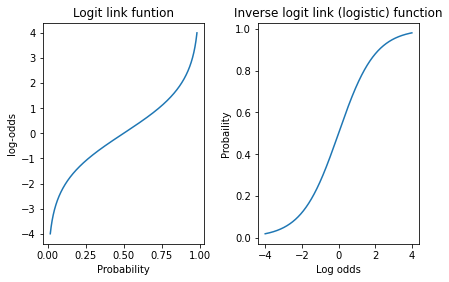

In [5]:
# Generate numbers from logistic function 
y = np.linspace(-4, 4, num = 1000)
x = stats.logistic.cdf(y)

# plot logit function
plt.subplot(1, 2, 1);
plt.plot(x,y);
plt.title("Logit link funtion");
plt.xlabel('Probability');
plt.ylabel('log-odds');

# plot inverse logit function
plt.subplot(1, 2, 2);
plt.plot(y,x);
plt.title("Inverse logit link (logistic) function");
plt.xlabel('Log odds');
plt.ylabel('Probaility');

# Add space between subplots
plt.tight_layout(pad=1)

For clarity, the plots above show how the logit function maps the probability scale to the log odds scale and how the inverse logit log odds to probability scale.

# Steps of Bayesian data analysis

<font size = "3"> Kruscke (2015) offers a step by step formulation for how to conduct a Bayesian analysis:

1. Identify the relevant data for question under investigation.

2. Define the descriptive (mathematical) model for the data.

3. Specify the Priors for the model. In the case of scientific research publication is the goal, as such the priors must be accepted by a skeptical audience. Much of this can be achieved using prior predcitve checks to acsetain os the priors are reasonable.

4. Using Bayes rule estimate the posterior for the parameters of the model using the likelihood and priors. Then interprete and the posterior

5. Conduct model checks. i.e. Posterior predcitive checks.</font> 

<font size = "1">This notebook will follow this approach generally.</font> 

#  Step 1 - Identify the relevant data for question under investigation

The following data has been downloaded from https://www.sheffield.ac.uk/mash/statistics/datasets and contains data about from 42 mothers and their newborns. The change in the source of data here from https://sites.google.com/view/openstatslab used within the other notebooks is simply due to no datasets specifcally aimed at demonstrating logistic regression at https://sites.google.com/view/openstatslab.

As stated above the data used below is from mothers and their newborns. The point of the logistic regression analysis below is estimate the log-odds (then the probability) of low birth weight (low being defined as a infant that ways < 6$lbs$, codes as 1 in the dataset below) using relevant predictor variables. Within the first analysis below only a dictomous predictor variable will be modelled - smoking status of the mother - in order to estimate the difference in the probability of the child being born < 6$lbs$ in weight between Smoker and non-smoking mothers. Of the 42 mothers: 22 were smokers  (coded as 1) and 20 were non-smokers (coded as 0).

In [123]:
# Change working directorty to import data for analysis.
url = "https://raw.githubusercontent.com/ebrlab/Statistical-methods-for-research-workers-bayes-for-psychologists-and-neuroscientists/master/wip/Data/Birthweight_reduced_kg.csv"
#Import data .csv file into pandas dataframe.
df = pd.read_csv(url)

# Output data frame for evaluation
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


# Exploratory analysis and daata visualisation

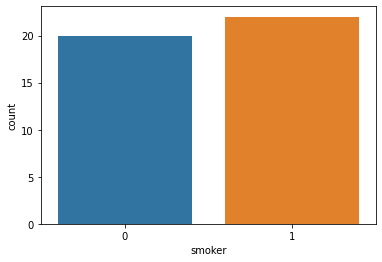

In [8]:
# plot the numner of smokers vs non smokers.
sns.countplot(x="smoker", data=df);

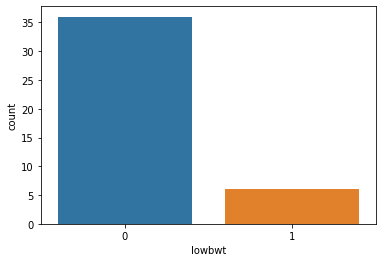

In [9]:
# plot the numner of low birth weight vs non low-birthweight births.
sns.countplot(x="lowbwt",  data=df);

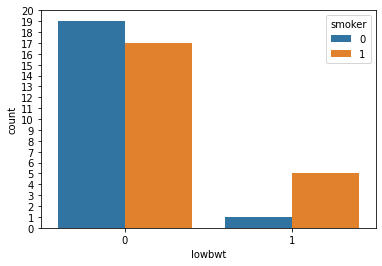

In [10]:
# Plot the count of low birthweight vs non births vs non low-birthweight births split by smoking status.
sns.countplot(x="lowbwt", hue="smoker", data=df).set_yticks(list(range(0, 21)));

# Step 2 - Define the descriptive statistical model \begin{align*}
\\y_n &\sim Bernoulli(logistic(\alpha + \beta x))
\\
\alpha &\sim Normal(0, 1.5)
\\
\beta &\sim Normal(0,0.3)
\end{align*}

# Step 3 - Specifying priors

Of course the analysis below is a Bayesian data analysis and therefore we need to specify priors. The difficulty of specifying priors for logistic regression extends beyond expressing our ignorance of model parameters in terms of probabilities; because priors withinin a logistic regression are expressed in terms of log-odds. The difficulty of this arises due to the mapping between log-odds and probabilities being non-linear (see, plots above). Therefore, using prior predictive checks is a good safeguard from specfiying ridiculous priors and can show why the ones selected above have been selected essentially for being reasonable when dealing with non-linearity as well as relatively uninformative. 

The prior predictive checks within this analyis will be conducted using Stan instead of directly coding it up using python as was done for some of the other notebooks.

## Stan model

In [80]:
logisticRegression = """

data {

  int<lower=0> N;
  int K;
  matrix[N,K] x;
  int<lower=0,upper=1> y[N];
  
  // logically evaluates below to determine if to run Prior predictive checks.
  int<lower= 0, upper = 1> onlyprior; 
  
  // values for setting priors in the model block
  real intercept_mu;
  real<lower =0> intercept_sd;
  
  real slope_mu;
  real<lower =0> slope_sd;
  
}

parameters {
// First beta parameter is the alpha parameter of the model
// This format is simple shorter and allows vectorisation
  vector[K] beta;
}

model {
// Priors
beta[1] ~ normal(intercept_mu, intercept_sd);

// Set up to generalise to greater number of predictors
for (i in 2:K){
beta[i] ~ normal(slope_mu, slope_sd);
}

// Likelihood
 if(!onlyprior)
  y ~ bernoulli_logit(x * beta);
}

generated quantities{

//Vectorised prior/posterior checks
int yrep[N] = bernoulli_logit_rng(x * beta);

// Ouput the converted log-odds of the estimated parameters to the probability scale (0,1) 
// using the inverse logit function
vector[K] P_beta = inv_logit(beta);

}

"""

## Prior predicitve checks

In [125]:
x = pt.dmatrix(" ~ smoker", data = df)
x = np.asarray(x)

prior_data = {'N': len(df),
        'x': x,
        'K': 2,
        'y': df["lowbwt"].values,
        # set to 1 to run prior predcitive check
        'onlyprior': 1,
        'intercept_mu': 0.,
        'intercept_sd': 1.5,
        'slope_mu': 0.,
        'slope_sd': .3}

In [108]:
# Build stan model will give stanc3 warning about having no priors set,
# however, but based on testing various priors the warning is a Bug.
# see, https://discourse.mc-stan.org/t/seeing-warning-the-parameter-has-no-priors-when-i-shouldnt/22839
sm = ps.build(logisticRegression, data = prior_data,random_seed = 1)

Building...



Building: found in cache, done.Messages from stanc:


In [109]:
prior_PC = sm.sample(num_chains = 4, num_samples = 2000);

Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 5e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.05 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!


/home/users/bu807041/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/users/bu807041/.local/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


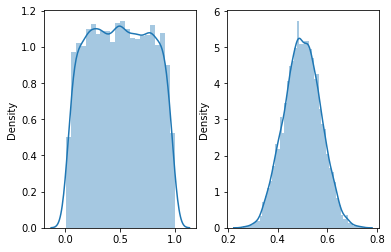

In [110]:
#Plot the probablities generated by the prior predcitive checks
plt.subplot(1, 2, 1);
sns.distplot(prior_PC['P_beta'][0]);
plt.subplot(1, 2, 2);
sns.distplot(prior_PC['P_beta'][1]);

As you can now see the priors that were selected result in relatively uniform prior distributions over probability scale of (0,1) for the intercept term and general balcance between potential for no effect at .5 probability and potetnial for larger effects on the slope terms before seeing the data.

An activity left to the curious reader if they are interested is to test the code above by altering the priors parameter values to test their impacts.

# Fitting the model

Now that reasonable priors have been specified above it is time to fit the model.

In [118]:
# Change dictionary values for onlyprior to sample from the posterior
prior_data['onlyprior'] = 0

# Update model build 
sm = ps.build(logisticRegression, data = prior_data,random_seed = 1)

Building...



Building: found in cache, done.Messages from stanc:


In [112]:
fit = sm.sample(num_chains = 4, num_samples = 2000)

Sampling:   0%
Sampling: 100%, done.
Messages received during sampling:
  Gradient evaluation took 2.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.26 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.21 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.6e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.16 seconds.
  Adjust your expectations accordingly!


In [121]:
# Put MCMC values in pandas dataframe
fit_df = fit.to_frame()

# Ouptpur model results
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta[0],-1.768,0.440,-2.579,-0.939,0.006,0.005,4804.0,4945.0,1.0
beta[1],0.116,0.276,-0.410,0.623,0.004,0.003,4729.0,4500.0,1.0
yrep[0],0.158,0.365,0.000,1.000,0.004,0.003,7806.0,7806.0,1.0
yrep[1],0.156,0.363,0.000,1.000,0.004,0.003,8087.0,8000.0,1.0
yrep[2],0.159,0.365,0.000,1.000,0.004,0.003,7933.0,7933.0,1.0
yrep[3],0.157,0.364,0.000,1.000,0.004,0.003,7340.0,7340.0,1.0
yrep[4],0.150,0.358,0.000,1.000,0.004,0.003,7448.0,7448.0,1.0
yrep[5],0.164,0.370,0.000,1.000,0.004,0.003,7678.0,7678.0,1.0
yrep[6],0.157,0.364,0.000,1.000,0.004,0.003,7644.0,7644.0,1.0
yrep[7],0.159,0.365,0.000,1.000,0.004,0.003,7702.0,7702.0,1.0


In [114]:
# Outputs from the fitted model.
fit_df.tail()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,beta.1,beta.2,yrep.1,...,yrep.35,yrep.36,yrep.37,yrep.38,yrep.39,yrep.40,yrep.41,yrep.42,P_beta.1,P_beta.2
draws,,,,,,,,,,,,,,,,,,,,,
7995,-19.259727,0.988372,0.837780,3.0,7.0,0.0,20.583650,-1.254099,-0.331076,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.221991,0.417979
7996,-18.318079,1.000000,0.807137,2.0,3.0,0.0,19.015957,-1.656072,-0.165430,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160290,0.458736
7997,-17.993402,1.000000,0.668544,2.0,3.0,0.0,18.819462,-1.826603,0.291792,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138643,0.572435
7998,-19.363753,0.795965,0.908228,2.0,3.0,0.0,19.403581,-2.452771,0.053867,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.079236,0.513464
7999,-18.433238,0.989092,0.837780,2.0,7.0,0.0,19.607552,-1.984353,0.424689,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.120856,0.604605


# Post model fit-visualisations - Bayesian logisitc regression

## Posterior distribution plots

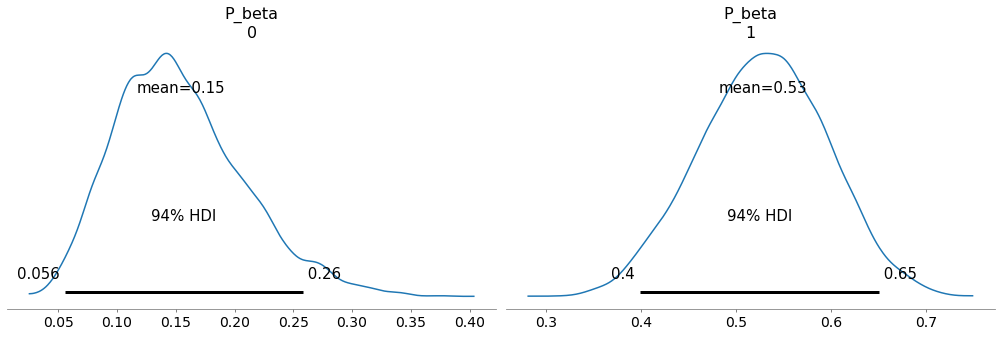

In [115]:
az.plot_posterior(fit,var_names = ('P_beta'));

## Posterior  autocorrelation plots

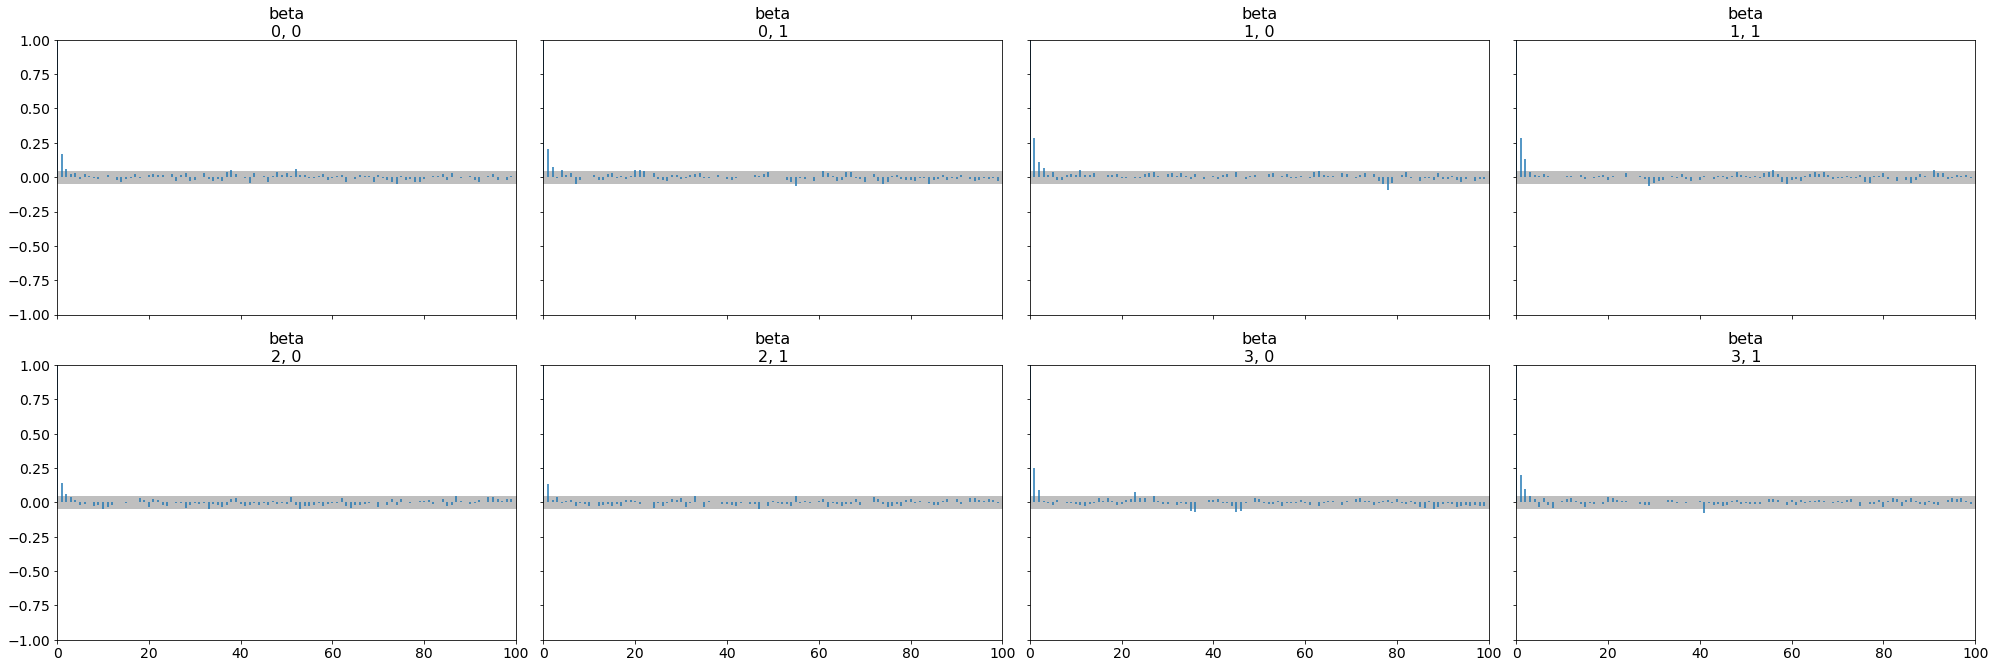

In [116]:
az.plot_autocorr(fit,var_names = ('beta'));

Autocorrelation plots show no issues with autocorrelation for MCMC chains, with all of them quickly returning to zero.

# Posterior trace plots 

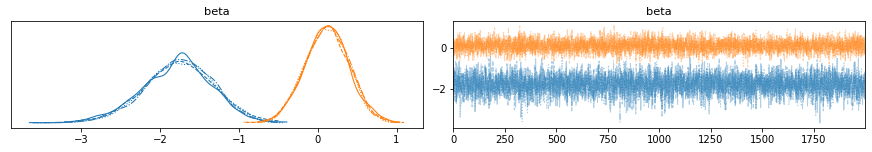

In [117]:
az.plot_trace(fit,var_names = ('beta'));

# Step 5 - Posterior predictive checks

# Reporting the results of the Bayesian logistic regression

<font size = "3">As Kruscke correctly points out there is not standard formula or presentation method for results in journal articles like the APA guide for reporting frequentist analysis using the Bayesian framework. It is likely there never will be, because as McElreath (2020) explains, Bayesian data analysis is more like a engineering approach to the problem and the resulting model that is fit will be analysis specific. In addition, as Gabry et al, (2019) argue visualisations maybe even more key for decribing and analysis (show dont tell); as such the all the visualisations used above would likely be included with any write up. Anyway,  the write up below generally follows the advice of Kruscke (2015) chapter 25. In any application though it comes down to the problem to be described and the audience that needs to be convinced. </p><br/>

<h2>Write up</h2><br/>

Simple 1 IV logistic regression.

The data on newborn weights were analysed in order to estimate the probability of infants being underweight (dichotomised as $y < 6 lbs = $ underweight, by fitting the logistic regression model defined above using mother smoking status during pregnancy as as predictor. As the model is a logistic regression regression the likelihood used was the bernoulli likelihood using the logit link function, with $\alpha$ and $\beta$ parameters. The prior selected for the $\alpha$ parameter was $Normal(0, 1.5)$ and for the $\beta$ parameter $Normal(0, 0.3$. These priors were determined through conducting prior predictive checks and observing that model parameters in the case of $\alpha$ parameter has uniform prior probaiblity for the probability scores before seeing the data. In the case of $\beta$ parameter prior probability is given for a range of probability scores estimates but not overly extreme probabilites such as 0 or 100%.
 
Four MCMC chains were ran to acquire 2000 samples with the first 1000 samples being for warm up. Resulting in 4000 saved posterior samples for use in the inferences. Convergence of the MCMC chains was examined using autocorrelation and traceplots (in a paper referencing appropriate figures here will be of value). Both sets of plots showed no issues of autocorrelation or lack of mixing for the chains.

Using dummy coding for the contrasts of interest the model parameter posteriors showed that the most credible value for the $\alpha$ parameter (the average probabilty for birthweight to be < 6lbs for non-smoking mothers) to be $\mu$ = .16 with a 95% CrI [.06, .26]). The $\beta$ parameter (under dummy coding the difference in probaability between non-smoker & smokers) most credible value to be $\mu$ = .53 with a 95% CrI [.40, .66]). For this analysis, the crucial parameter of interest is the $\beta$ parameter for the contrast between non-smokers and smokers mother and probability of low infant birth weight. As the credible values for $beta$ showed the 95% CrI [.40, .66] was consistent with the data and thus we have can predict ubased on this estimation that smoking during pregnancy increases the probabilty of an infants birthweight being $< 6lbs$ between .40 and .66 percent with a 95% probability.

Finally posterior predictive checks showed that the orignal data could be reasonble generated by the model.

# Multiple logistic regression

The simple example above was equivalnet to a comparison of proportions, but logistic regression like other types of regression can be expanded to model multiple predictors at once. This will be demonstrated in the following section below.

# Adding predictor variables

For the example below an additonal predictor varaible will be added to the analysis. The predictor added to the analysis is mothers age a continous predictor that has been found to seemingly affect many postnatal outocomes including birthweight (Richards, Hardy, Kuh, & Wadsworth, 2002). The model used above was laid out to be generalisable if prior are desired to be kept constant to the example above. Based on the reasons above the prior values are not going to  be changed here.

## Fitting multiple logistic regression

In [148]:
# Create the design matrix for the logistic regression
x_2 = pt.dmatrix(" ~ smoker + mage ", data = df)
x_2 = np.asarray(x_2)
# Center age variable for more interpretable coefficents
# (age of zero is non-sensical generally, but especially when discussing mothers).
x_2[:,2] = x_2[:,2] - np.mean(x_2[:,2])

In [144]:
data_multiple = {'N': len(df),
        'x': x_2,
        'K': x_2.shape[1],
        'y': df["lowbwt"].values,
        # set to 1 to run prior predcitive check
        'onlyprior': 0,
        'intercept_mu': 0,
        'intercept_sd': 1.5,
        'slope_mu': 0,
        'slope_sd': .3}

In [145]:
# Update model build 
sm = ps.build(logisticRegression, data = data_multiple, random_seed = 1)

Building...



Building: found in cache, done.Messages from stanc:


In [146]:
fit_2 = sm.sample(num_chains = 4, num_samples = 2000)

Sampling:   0%
Sampling:  25% (3000/12000)
Sampling:  50% (6000/12000)
Sampling:  75% (9000/12000)
Sampling: 100% (12000/12000)
Sampling: 100% (12000/12000), done.
Messages received during sampling:
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.1 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.17 seconds.
  Adjust your expectations accordingly!


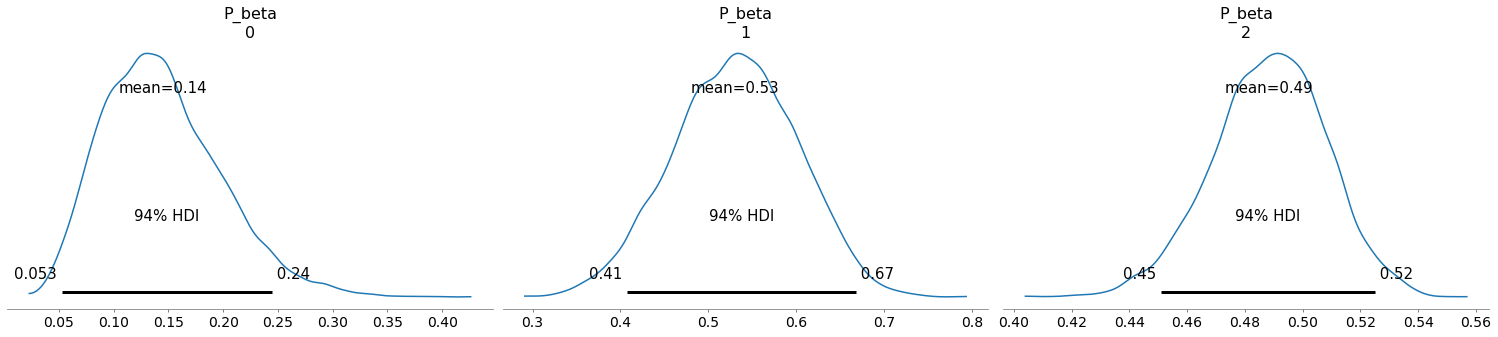

In [147]:
az.plot_posterior(fit_2,var_names = ('P_beta'));

# Reporting the results of the Bayesian multiple logistic regression
All of Kruscke factors discussed above are all relevant again here.


<h2>Write up</h2><br/>

Multiple logistic regression.


# References

Burkov A. (2019) The hundred page machine learning book. Self published.

Gabry, J., Simpson, D., Vehtari, A., Betancourt, M., & Gelman, A. (2019). Visualization in Bayesian workflow. Journal of the Royal Statistical Society: Series A (Statistics in Society), 182(2), 389-402.

Gelman, A., J, Hill., A, Vehtari (2020). Regression and other stories. New york, NY: Cambridge university Press.
    
Kruschke, J. (2015). Doing Bayesian data analysis: A tutorial with R, JAGS and Stan. Oxford, England: Academic Press.    
    
McElreath, R. (2020). Statistical rethinking: A Bayesian course with examples in R and Stan. Boca Raton: CRC Press.

Martin, Osvaldo. (2016). Bayesian data analysis using python. Birmingham, England: Packt Publishing.

Richards, M., Hardy, R., Kuh, D., & Wadsworth, M. E. (2002). Birthweight, postnatal growth and cognitive function in a national UK birth cohort. International Journal of Epidemiology, 31(2), 342-348.